<a href="https://colab.research.google.com/github/KalyaniKudalkar/Data-Analytics-1_Exercises/blob/main/Exercises_Day_13_15_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Loading and Exploration

Load a time series dataset, plot it, and identify trends, seasonality, or irregular patterns.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Rainfall_Data_Germany_Complete.csv')

print(df.head())

     City  Latitude  Longitude  Month  Year  Rainfall (mm)  Elevation (m)  \
0  Berlin     52.52     13.405      1  2015          71.56             34   
1  Berlin     52.52     13.405      2  2015         129.56             34   
2  Berlin     52.52     13.405      3  2015          24.58             34   
3  Berlin     52.52     13.405      4  2015         177.73             34   
4  Berlin     52.52     13.405      5  2015         100.62             34   

  Climate_Type  Temperature (°C)  Humidity (%)  
0      Oceanic              19.6            72  
1      Oceanic              31.4            88  
2      Oceanic              15.4            61  
3      Oceanic              15.1            62  
4      Oceanic              -3.0            57  


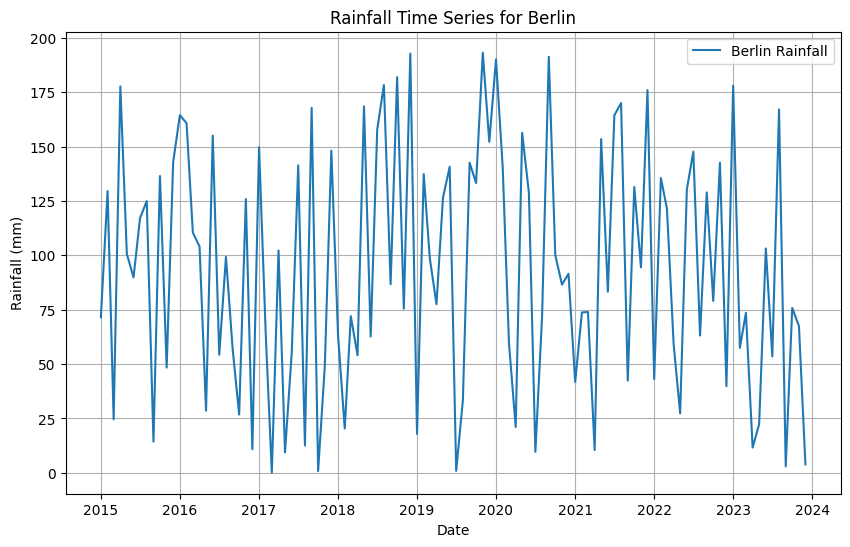

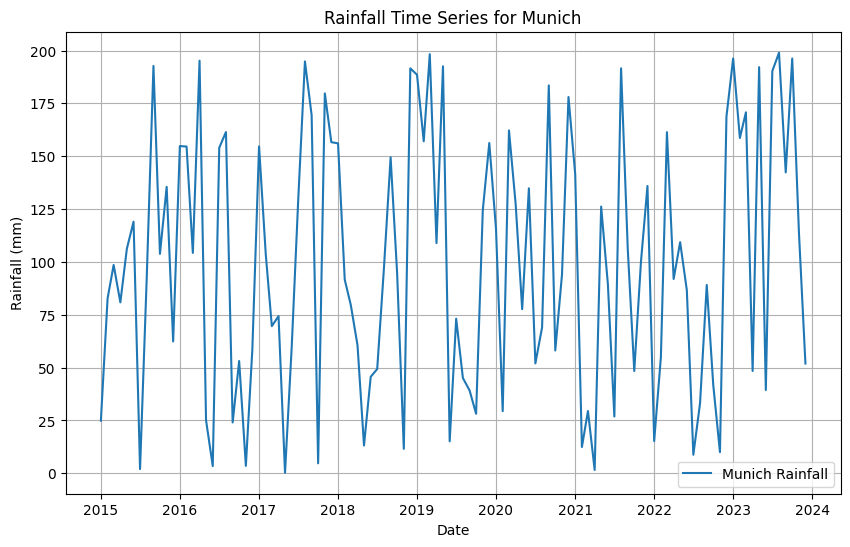

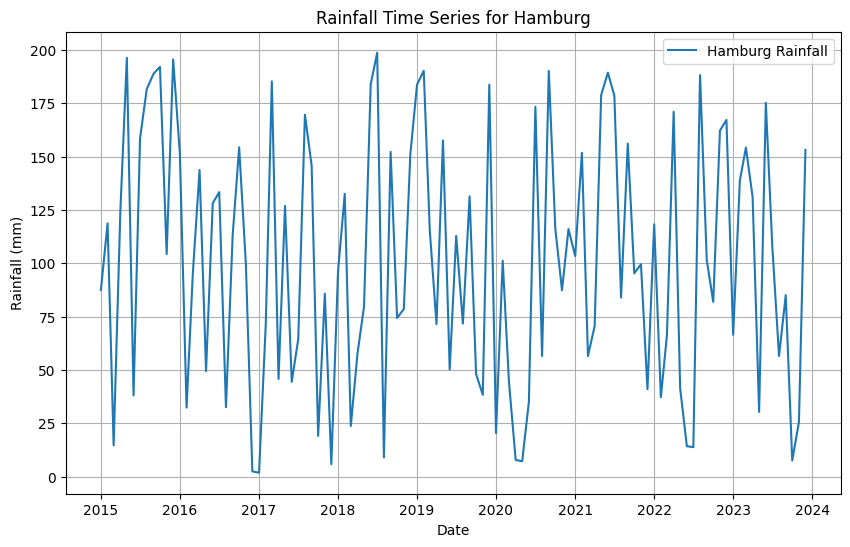

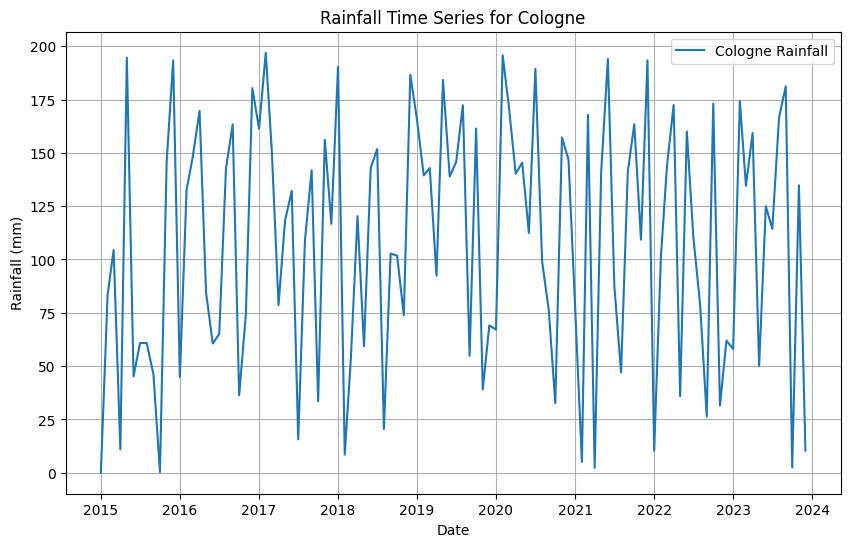

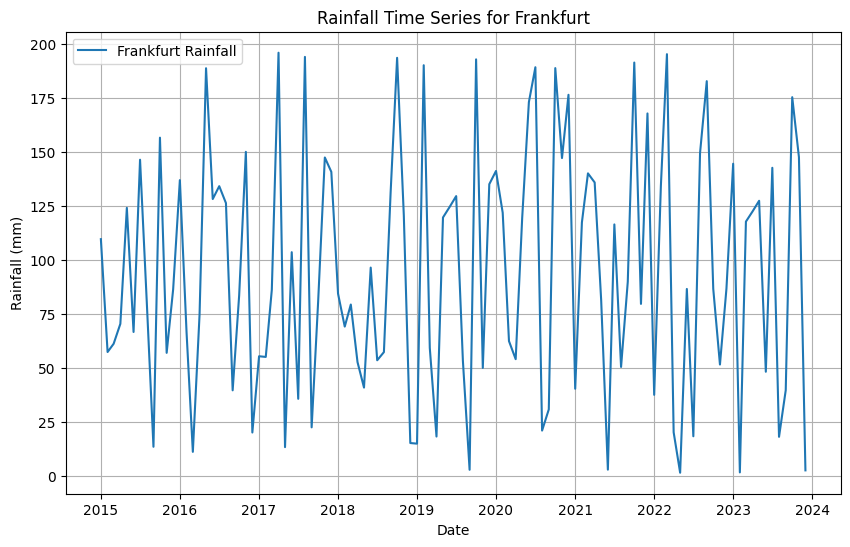

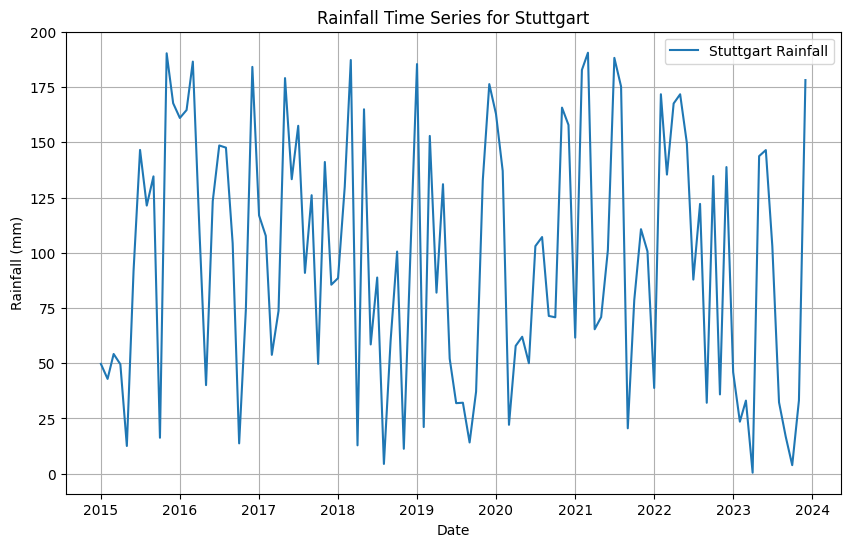

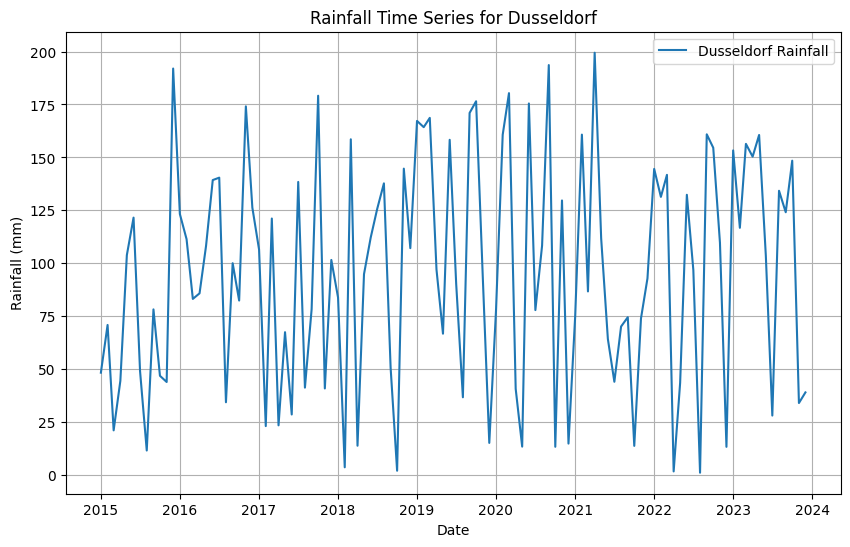

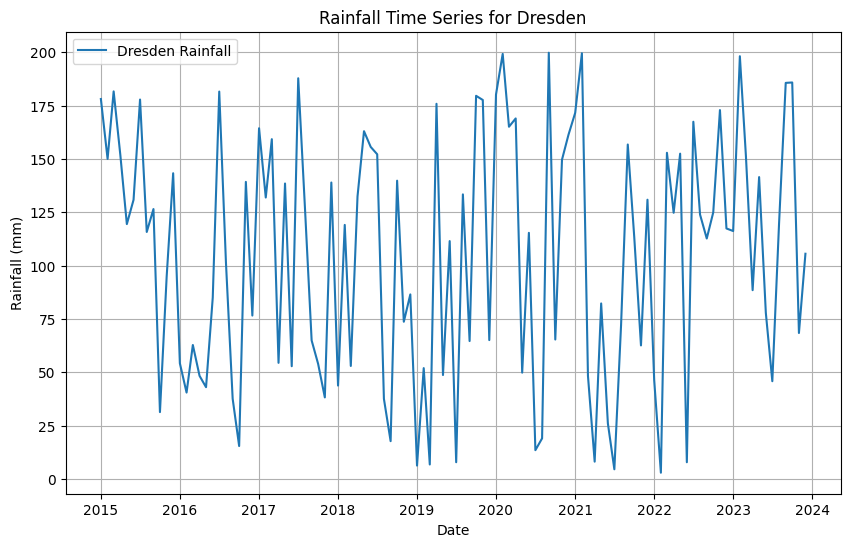

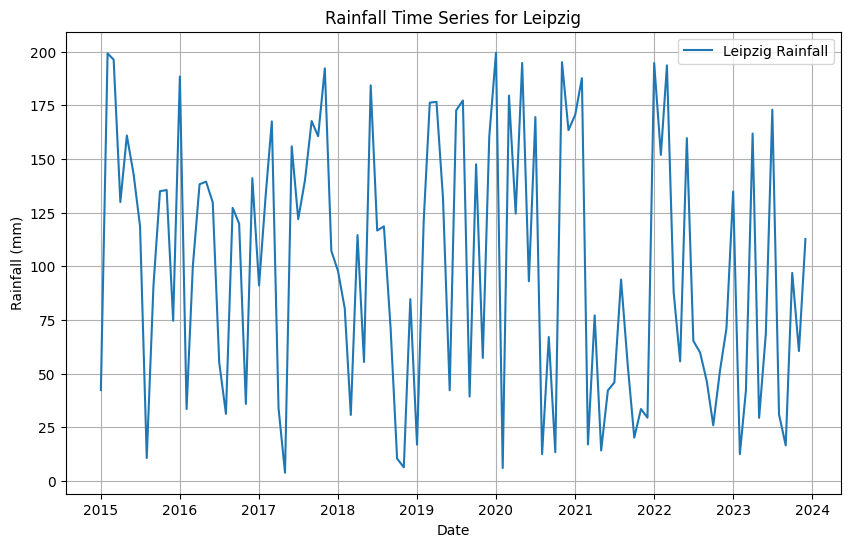

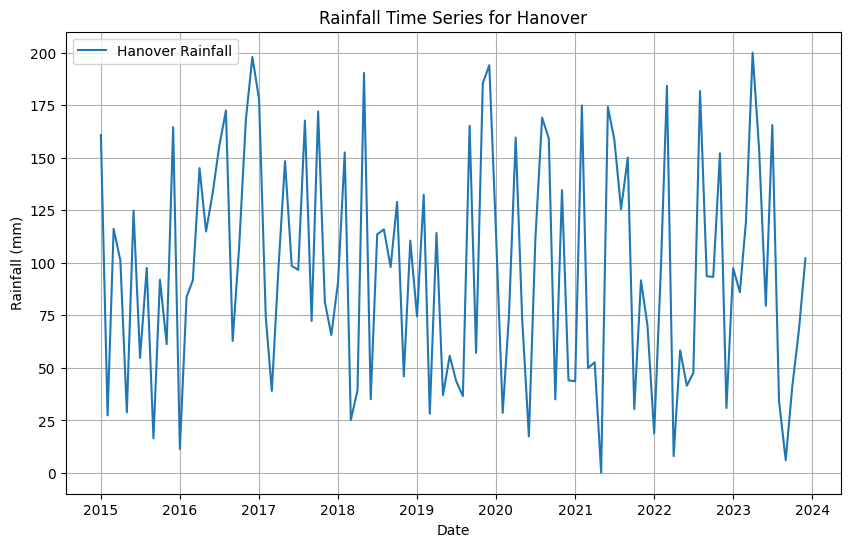

In [54]:
# Converted the 'Month' and 'Year' columns to a datetime format
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

# Grouped by city and plotted the time series for each city
cities = df['City'].unique()

for city in cities:
    city_data = df[df['City'] == city]
    plt.figure(figsize=(10, 6))
    plt.plot(city_data['Date'], city_data['Rainfall (mm)'], label=f'{city} Rainfall')
    plt.title(f'Rainfall Time Series for {city}')
    plt.xlabel('Date')
    plt.ylabel('Rainfall (mm)')
    plt.legend()
    plt.grid(True)
    plt.show()

Here, I have taken a Rainfall data from Germany which is a classic example of time series data. This dataset is ideal for exploring trends, seasonality, and irregular patterns. By grouping the cities, I have plotted the time series for each city.

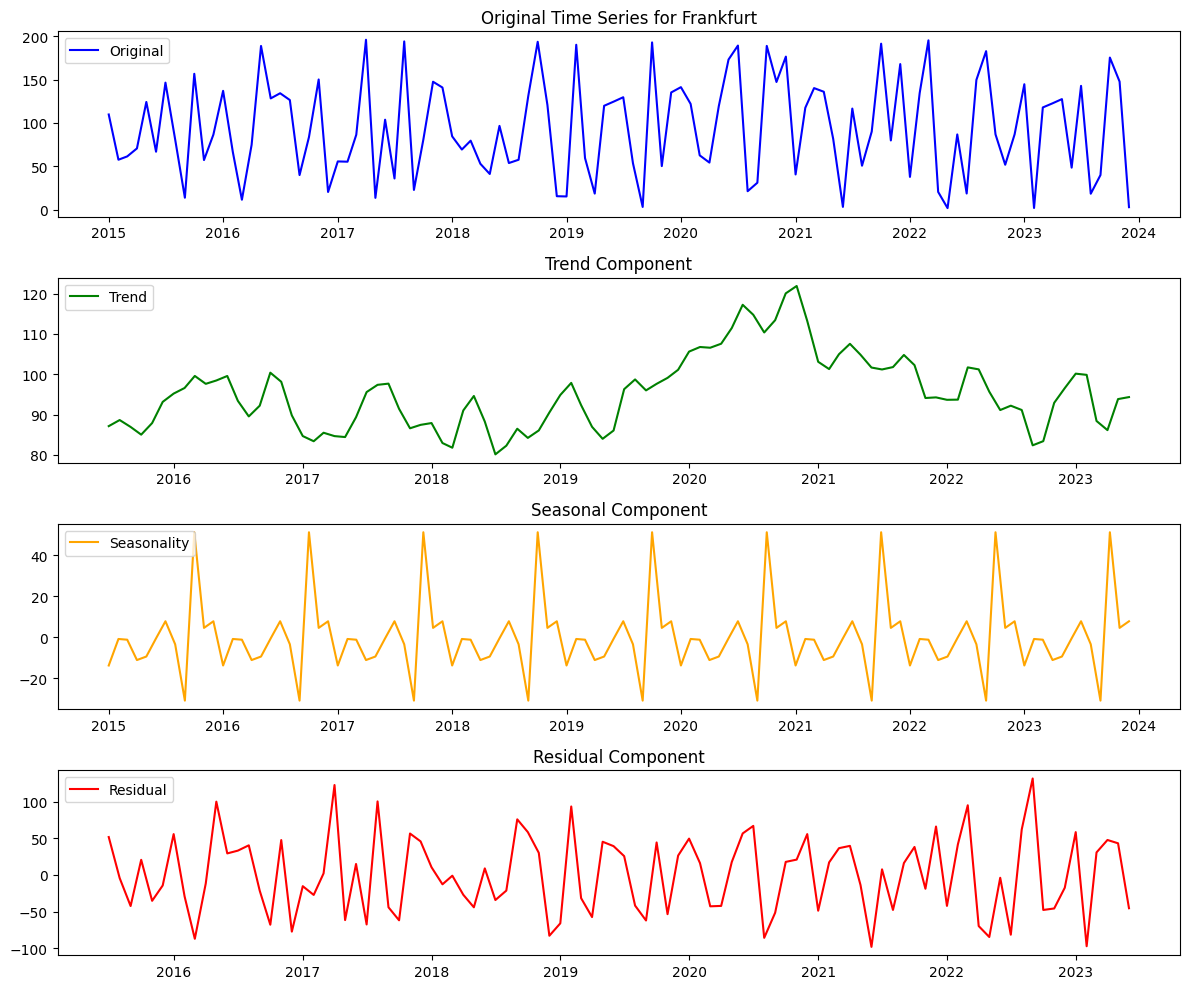

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Selected a specific city (e.g., Frankfurt)
city = 'Frankfurt'
city_data = df[df['City'] == city].set_index('Date')

# Extracted the rainfall time series for the selected city
time_series = city_data['Rainfall (mm)']

# Decompose the Time Series
decomposition = seasonal_decompose(time_series, model='additive', period=12)  # Monthly data, so period=12

# Extract Components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the Components
plt.figure(figsize=(12, 10))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original', color='blue')
plt.title(f'Original Time Series for {city}')
plt.legend(loc='upper left')

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend(loc='upper left')

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**Justification:**

The decomposition is a fundamental step in time series analysis, as it provides insights into the underlying patterns and helps in selecting appropriate modeling techniques.

1. The Original Time Series shows the raw rainfall data for the selected city (Here, I have selected 'Frankfurt').
2. The trend component helps identify long-term patterns (e.g., increasing or decreasing rainfall).
3. The seasonal component highlights recurring patterns (e.g., higher rainfall in certain months).
4. The residual component shows the irregular fluctuations or noise in the data.



# 2. Time Series Decomposition

Decompose the series (Additive/Multiplicative) into Trend, Seasonality, and Residuals; plot and analyze each component.

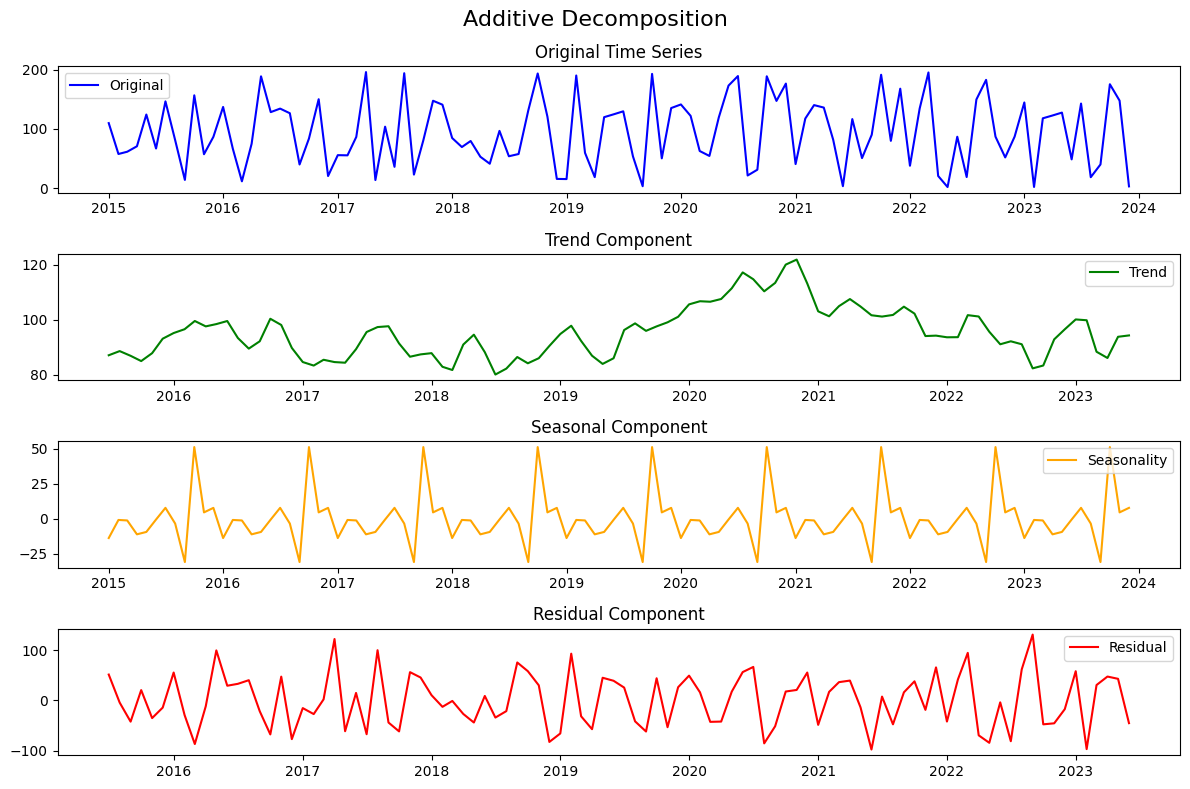

In [56]:
# Additive Decomposition
additive_decomposition = seasonal_decompose(time_series, model='additive', period=12)

# Plot Additive Decomposition
plt.figure(figsize=(12, 8))
plt.suptitle('Additive Decomposition', fontsize=16)

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original', color='blue')
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(additive_decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(additive_decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(additive_decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

**Justification:**

The additive time series decomposition is the appropriate choice for this dataset because the seasonal component is constant over time and does not vary with the trend.

This decomposition is performed to check its trend, seasonal, and residual components where each component is plotted separately to help visualize and analyze the structure of the time series.


# 3. Trend Estimation

Apply Simple Moving Average (SMA) and Weighted Moving Average (WMA); experiment with parameters and plot results.

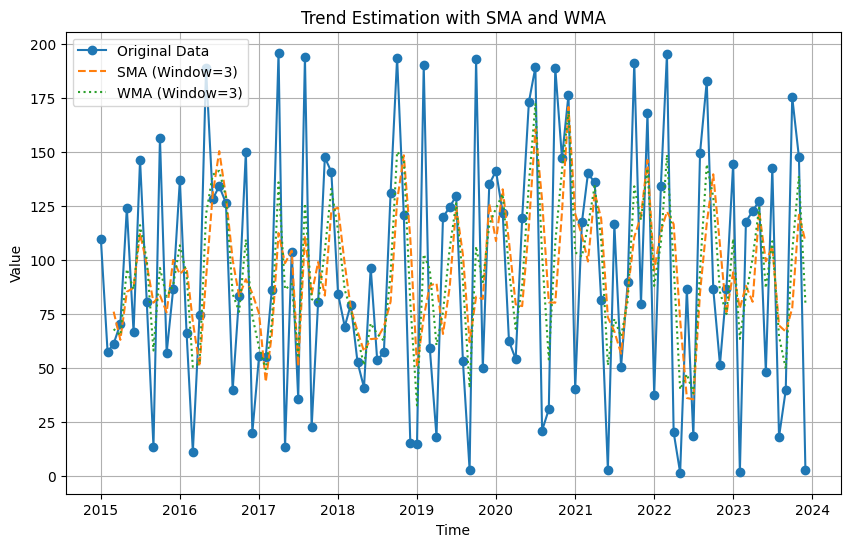

In [57]:
# Simple Moving Average (SMA) function
def calculate_sma(time_series, window):
    return time_series.rolling(window=window).mean()

# Weighted Moving Average (WMA) function
def calculate_wma(city_data , window):
    weights = np.arange(1, window + 1)
    return time_series.rolling(window=window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Parameters
window_size = 3  # Adjust the window size as needed

# Calculate SMA and WMA
sma = calculate_sma(time_series, window_size)
wma = calculate_wma(time_series, window_size)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Original Data", marker="o")
plt.plot(sma, label=f"SMA (Window={window_size})", linestyle="--")
plt.plot(wma, label=f"WMA (Window={window_size})", linestyle=":")
plt.title("Trend Estimation with SMA and WMA")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

**Justification:**

SMA is a simple and effective method for smoothing time series data and identifying the underlying trend where as WMA is more responsive to recent changes in the data because it assigns higher weights to more recent observations.

For the Rainfall Data:

The time series data likely has a seasonal component, but the trend may not change drastically over short periods.

SMA is a good choice because it provides a smooth and stable trend line, which is useful for understanding the long-term behavior of rainfall.

WMA may not provide significant benefits unless the data shows rapid changes in the trend, which is less likely for rainfall data.

# 4. Exponential Smoothing


Use Single (SES), Double (Holt’s Linear Trend), and Triple (Holt-Winters) Exponential Smoothing; tune parameters and evaluate effectiveness.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-58-ec9d24623d26>:12: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, optimized=False)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


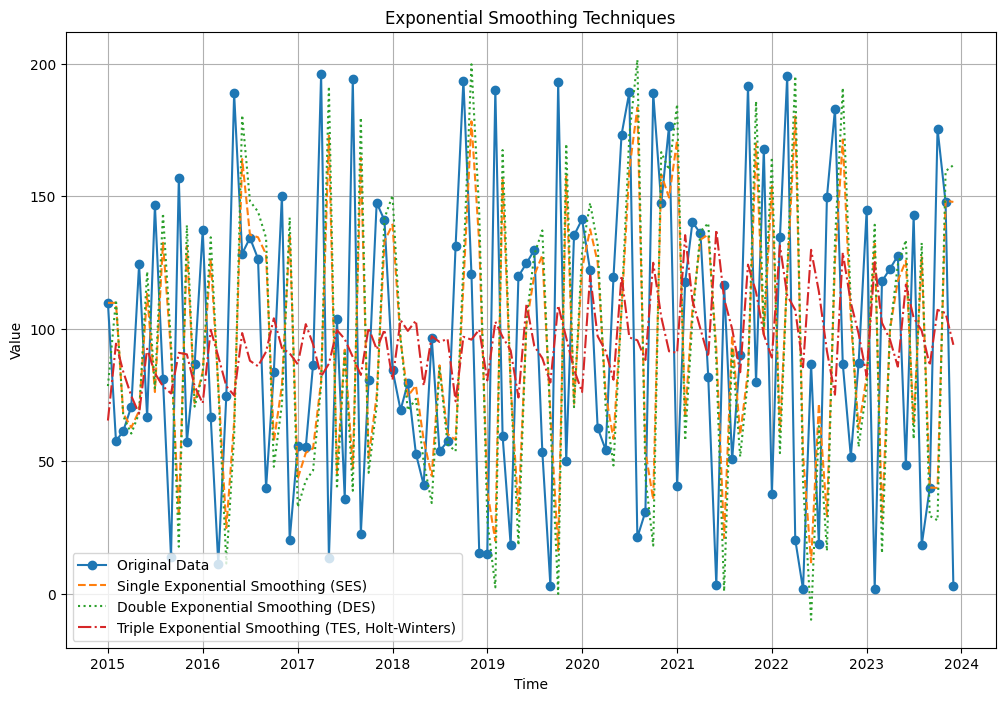

SES Forecast: 2024-01-01    31.773164
2024-02-01    31.773164
2024-03-01    31.773164
Freq: MS, dtype: float64
DES Forecast: 2024-01-01    20.793651
2024-02-01     7.032950
2024-03-01    -6.727752
Freq: MS, dtype: float64
TES Forecast: 2024-01-01     82.443179
2024-02-01    112.044382
2024-03-01    106.719908
Freq: MS, dtype: float64


In [58]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# 1. Single Exponential Smoothing (SES)
def single_exponential_smoothing(time_series, smoothing_level=0.8):
    model = SimpleExpSmoothing(time_series)
    fitted_model = model.fit(smoothing_level=smoothing_level, optimized=False)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# 2. Double Exponential Smoothing (DES)
def double_exponential_smoothing(time_series, trend="add", smoothing_level=0.8, smoothing_slope=0.2):
    model = ExponentialSmoothing(time_series, trend=trend, seasonal=None)
    fitted_model = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, optimized=False)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# 3. Triple Exponential Smoothing (Holt-Winters, TES)
def triple_exponential_smoothing(time_series, trend="add", seasonal="add", seasonal_periods=4):
    model = ExponentialSmoothing(time_series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fitted_model = model.fit(optimized=True)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# Apply smoothing methods
smoothing_level = 0.8
smoothing_slope = 0.2
seasonal_periods = 4

ses_fitted, ses_forecast = single_exponential_smoothing(time_series, smoothing_level)
des_fitted, des_forecast = double_exponential_smoothing(time_series, "add", smoothing_level, smoothing_slope)
tes_fitted, tes_forecast = triple_exponential_smoothing(time_series, "add", "add", seasonal_periods=seasonal_periods)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(time_series, label="Original Data", marker="o")
plt.plot(ses_fitted, label="Single Exponential Smoothing (SES)", linestyle="--")
plt.plot(des_fitted, label="Double Exponential Smoothing (DES)", linestyle=":")
plt.plot(tes_fitted, label="Triple Exponential Smoothing (TES, Holt-Winters)", linestyle="-.")
plt.title("Exponential Smoothing Techniques")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Forecast Output
print("SES Forecast:", ses_forecast)
print("DES Forecast:", des_forecast)
print("TES Forecast:", tes_forecast)

**Justification:**

1. Single Exponential Smoothing (SES): Suitable for time series without trend or seasonality. It provides a simple way to smooth the data and make short-term forecasts.

    Here, in Forecast, the SES model predicts that the rainfall will remain constant at approximately 31.77 mm for the next three months.

2. Double Exponential Smoothing (DES): Suitable for time series with a trend but no seasonality. It improves upon SES by incorporating a trend component.

    Here, the forecast for January 2024 is 20.793651 mm.

    The forecast for February 2024 is 7.032950 mm, which is lower than January, indicating a downward trend.

    The forecast for March 2024 is -6.727752 mm, which is negative. This suggests that the model predicts a significant decrease in rainfall, potentially indicating a dry period.

3. Triple Exponential Smoothing (Holt-Winters, TES): Suitable for time series with both trend and seasonality. It provides the most comprehensive smoothing and forecasting capability among the three methods.

    The forecast for January 2024 is 82.443179 mm, which is higher than the SES forecast but lower than the DES forecast.

    The forecast for February 2024 is 112.044382 mm, which is significantly higher than January, indicating a seasonal increase in rainfall.

    The forecast for March 2024 is 106.719908 mm, which is slightly lower than February, suggesting a slight decrease in rainfall after the peak in February.



# 5. Forecasting with AR, ARIMA, SARIMA

Fit ARIMA/SARIMA models, tune parameters (p, d, q, P, D, Q, s), forecast future values, and plot results.

**ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-59-f5eb48c014ad>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.dat

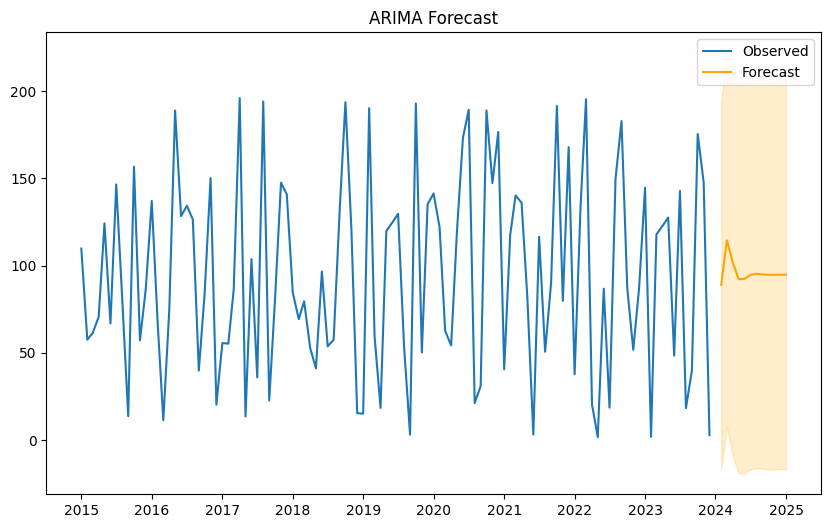

In [59]:
from statsmodels.tsa.arima.model import ARIMA

# Fit a simple ARIMA model
model = ARIMA(time_series, order=(2, 1, 2))  # Replace (p, d, q) with your preferred parameters
results = model.fit()

# Forecast future values
n_forecast = 12
forecast = results.get_forecast(steps=n_forecast)
forecast_index = pd.date_range(time_series.index[-1], periods=n_forecast + 1, freq='M')[1:]
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

ARIMA is a powerful and widely used method for time series forecasting due to its ability to model various types of time series data, its flexibility, and its effectiveness in capturing temporal dependencies.

The ARIMA model captures the general trend and seasonality in the data, but the accuracy of the forecast depends on the quality of the model and the parameters chosen.

**SARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-60-19585abd2391>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(time_series.index[-1], periods=n_forecast + 1, freq='M')[1:]


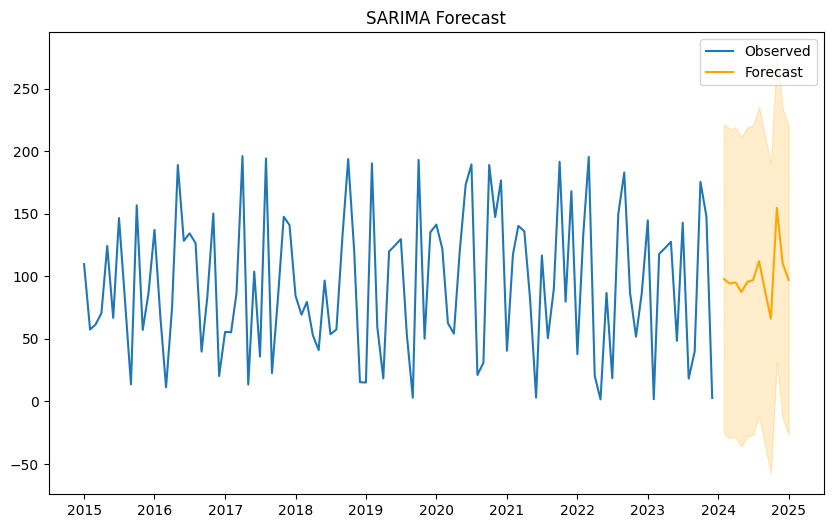

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a simple SARIMA model
model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)  # Replace (p, d, q, P, D, Q, s) with your preferred parameters
results = model.fit()

# Forecast future values
n_forecast = 12
forecast = results.get_forecast(steps=n_forecast)
forecast_index = pd.date_range(time_series.index[-1], periods=n_forecast + 1, freq='M')[1:]
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


SARIMA is an extension of ARIMA that includes seasonal components, making it suitable for time series data with seasonal patterns.

Here, the SARIMA model provides a forecast for the next 12 months of rainfall in Frankfurt city where the model captures both the trend and seasonal patterns in the data.

The plot visually compares the historical data (observed) with the forecasted values, making it easy to interpret the model's performance.

# 6. Evaluation

Compare models using metrics (e.g., MAE, RMSE); summarize the best-performing method and why.

In [61]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extracted the actual values from the time series
actual_values = time_series

# Extracted the fitted values for each model
ses_fitted_values = ses_fitted
des_fitted_values = des_fitted
tes_fitted_values = tes_fitted
arima_fitted_values = results.fittedvalues
sarima_fitted_values = results.fittedvalues

# Calculated MAE and RMSE for each model
def evaluate_model(actual, fitted):
    mae = mean_absolute_error(actual, fitted)
    rmse = np.sqrt(mean_squared_error(actual, fitted))
    return mae, rmse

# Evaluate SES, DES, TES, ARIMA, SARIMA
ses_mae, ses_rmse = evaluate_model(actual_values, ses_fitted_values)
des_mae, des_rmse = evaluate_model(actual_values, des_fitted_values)
tes_mae, tes_rmse = evaluate_model(actual_values, tes_fitted_values)
arima_mae, arima_rmse = evaluate_model(actual_values, arima_fitted_values)
sarima_mae, sarima_rmse = evaluate_model(actual_values, sarima_fitted_values)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"SES - MAE: {ses_mae:.2f}, RMSE: {ses_rmse:.2f}")
print(f"DES - MAE: {des_mae:.2f}, RMSE: {des_rmse:.2f}")
print(f"TES - MAE: {tes_mae:.2f}, RMSE: {tes_rmse:.2f}")
print(f"ARIMA - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")
print(f"SARIMA - MAE: {sarima_mae:.2f}, RMSE: {sarima_rmse:.2f}")

# Summarize the best-performing method
def summarize_best_model(metrics):
    best_model = min(metrics, key=lambda x: x[1])  # Compare based on RMSE
    return best_model

# Create a list of models and their RMSE values
model_metrics = [
    ("SES", ses_rmse),
    ("DES", des_rmse),
    ("TES", tes_rmse),
    ("ARIMA", arima_rmse),
    ("SARIMA", sarima_rmse)
]

# Best model
best_model, best_rmse = summarize_best_model(model_metrics)

print(f"\nBest-performing model: {best_model} with RMSE: {best_rmse:.2f}")
print(f"Reason: The {best_model} model has the lowest RMSE, indicating better predictive accuracy.")

Evaluation Metrics:
SES - MAE: 63.69, RMSE: 77.95
DES - MAE: 69.20, RMSE: 84.85
TES - MAE: 49.85, RMSE: 57.88
ARIMA - MAE: 56.52, RMSE: 66.62
SARIMA - MAE: 56.52, RMSE: 66.62

Best-performing model: TES with RMSE: 57.88
Reason: The TES model has the lowest RMSE, indicating better predictive accuracy.


**Justification:**

The model having a lowest RMSE is said to be the best-performing model, because it indicates the smallest average error between the predicted and actual values. The reason for choosing the best model is based on its ability to minimize the prediction error, which is crucial for accurate forecasting.